## PyTorch Basics

In [1]:
import torch

In [2]:
x = torch.empty(5, 3)
print(x)
print(x.size())

tensor([[-2.5667e+22,  4.5566e-41, -2.5667e+22],
        [ 4.5566e-41,  1.8578e-01,  3.9155e-02],
        [ 4.7429e+30,  3.4545e+30,  1.7674e+28],
        [ 1.4586e-19,  8.0318e+20,  1.2737e-14],
        [ 1.3987e-19,  1.3556e-19,  1.8567e-01]])
torch.Size([5, 3])


## MNIST classification using ANN

In [3]:
%pylab inline
import torch
import torchvision
import torchvision.transforms as transforms

import torch.utils.data.dataloader as dataloader
from torch.utils.data import TensorDataset
from torch.autograd import Variable
from torchvision.datasets import MNIST

Populating the interactive namespace from numpy and matplotlib


STEP1

In [4]:
# Create Dataset
train_set = MNIST('./data', train=True, download=True, transform=transforms.Compose([
    transforms.ToTensor(), # ToTensor does min-max normalization. 
]), )

test_set = MNIST('./data', train=False, download=True, transform=transforms.Compose([
    transforms.ToTensor(), # ToTensor does min-max normalization. 
]), )

# Create DataLoader
dataloader_args = dict(shuffle=True, batch_size=4)
train_loader = dataloader.DataLoader(train_set, **dataloader_args)
test_loader = dataloader.DataLoader(test_set, **dataloader_args)

classes = ('0', '1', '2', '3', '4', '5', '6', '7', '8', '9')

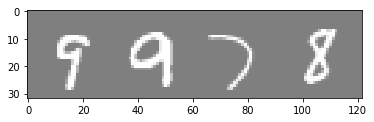

Label:      9     9     7     8


In [5]:
import numpy as np

# functions to show an image

def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(train_loader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print('Label: ',' '.join('%5s' % classes[labels[j]] for j in range(4)))

STEP2

In [6]:
import torch.nn as nn
import torch.nn.functional as F


class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.fc1 = nn.Linear(784, 1000)
        self.fc2 = nn.Linear(1000, 10)

    def forward(self, x):
        x = x.view((-1, 784))
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

model = Model()

STEP3

In [7]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

STEP4

In [8]:
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, (inputs, labels) in enumerate(train_loader):

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 1000 == 999:    # print every 1000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 1000))
            running_loss = 0.0

print('Finished Training')

[1,  1000] loss: 1.136
[1,  2000] loss: 0.483
[1,  3000] loss: 0.382
[1,  4000] loss: 0.362
[1,  5000] loss: 0.340
[1,  6000] loss: 0.296
[1,  7000] loss: 0.298
[1,  8000] loss: 0.276
[1,  9000] loss: 0.249
[1, 10000] loss: 0.240
[1, 11000] loss: 0.244
[1, 12000] loss: 0.248
[1, 13000] loss: 0.243
[1, 14000] loss: 0.200
[1, 15000] loss: 0.220
[2,  1000] loss: 0.199
[2,  2000] loss: 0.179
[2,  3000] loss: 0.179
[2,  4000] loss: 0.187
[2,  5000] loss: 0.160
[2,  6000] loss: 0.176
[2,  7000] loss: 0.160
[2,  8000] loss: 0.160
[2,  9000] loss: 0.152
[2, 10000] loss: 0.144
[2, 11000] loss: 0.155
[2, 12000] loss: 0.128
[2, 13000] loss: 0.144
[2, 14000] loss: 0.130
[2, 15000] loss: 0.141
Finished Training


STEP5

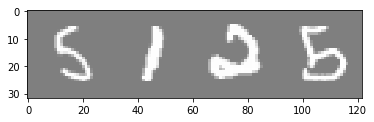

Predicted:      5     1     2     8


In [9]:
dataiter = iter(test_loader)
images, labels = dataiter.next()

imshow(torchvision.utils.make_grid(images))

outputs = model(images)
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))


In [10]:
correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the test images: 96 %
